# Predicting Housing Price
**Objective**

To create a machine learning model that can predict a house price given a set of features. <br>

**Task Description**

The "house.csv" file contains data describing real estate prices and certain features. It is required to conduct a data analysis of this data and conclude it with constructing a model optimized for predictive power of the property price based on the other features. The preferred programming language for the solution is either R or Python. The use of external libraries for data analysis, statistical modelling and Machine Learning. The solution should be reported to best highlight the candidate’s thinking process, describing the steps taken.

by Emmanuel Nunez <br>
email: eanunez85@gmail.com

## Data Exploration

### Load Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
data = 'housing/house.csv'
df = pd.read_csv(data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
'''from geopy.geocoders import Nominatim

# This section takes longer to process due to 

for i, idx in enumerate(df.id):
    if df.loc[i, 'address'] == 0:
        geolocator = Nominatim(user_agent=str(idx))
        location = geolocator.reverse('{}, {}'.format(df.lat[i], df.long[i]))
        df.loc[i, 'address'] = location.address

with open('housing/house_mod.csv', 'w+', encoding='utf-8', newline='') as f:
    df.to_csv(f, index=False)'''

"from geopy.geocoders import Nominatim\n\n# This section takes longer to process due to \n\nfor i, idx in enumerate(df.id):\n    if df.loc[i, 'address'] == 0:\n        geolocator = Nominatim(user_agent=str(idx))\n        location = geolocator.reverse('{}, {}'.format(df.lat[i], df.long[i]))\n        df.loc[i, 'address'] = location.address\n\nwith open('housing/house_mod.csv', 'w+', encoding='utf-8', newline='') as f:\n    df.to_csv(f, index=False)"

### Pre-processing

In [4]:
df.date = pd.to_datetime(df.date, format='%Y%m%dT%H%M%S')
# df.date
df['doy'] = df.date.dt.dayofyear
df.drop('date', axis=1, inplace=True)
df.doy

0        286
1        343
2         56
3        343
4         49
        ... 
21608    141
21609     54
21610    174
21611     16
21612    288
Name: doy, Length: 21613, dtype: int64

In [5]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
doy                int64
dtype: object

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,doy
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,184.314949
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,94.745659
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,110.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,178.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,262.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,365.000000


From the preceding lines:
- We extracted the day of the year and replace the date as feature and thus creating all numerical features.
- The values are numeric of type int, float and datetime. 
- Each column has different range of values which later will be normalized during the feature engineering.
- Some features are categorical such as id, waterfront, yr_built, yr_renovated and zip code. The rest of the of the features are numeric.

### Missing Values

In [7]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
doy              0
dtype: int64

There is no missing value.

### Visualize

In [8]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


 mu = 540088.14 and sigma = 367118.70

skewness: 4.02



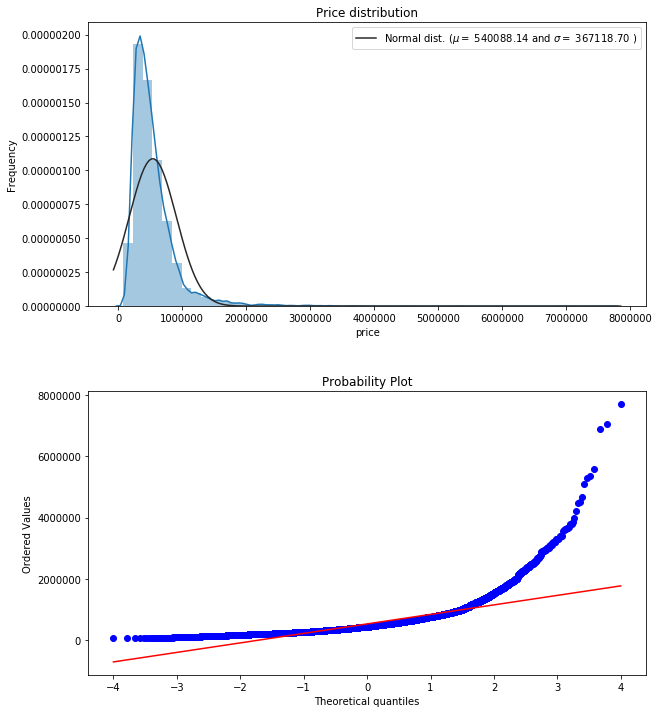

In [9]:
from scipy import stats
from scipy.stats import norm, skew

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.3)

sns.distplot(df.price , fit=norm, ax=ax1)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df.price)
skewness = skew(df.price)

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print('skewness: {:.2f}\n'.format(skewness))

#Now plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Price distribution')
# ax1.set_yscale('log')

#Get also the QQ-plot
res = stats.probplot(df.price, plot=ax2)
plt.show()

The price is heavily skewed which should be avoided when dealing with regression modelling as the model tries to achieve homogeneous variances and linearity of the fit. Other models such as tree-based are not sensitive to outliers and may not require data transformation.<br>
We would apply data transformation of this target variable along with its associated features in order to reduce the skewness and produce a distribution close to normal.


 mu = 13.05 and sigma = 0.53

skewness: 0.43



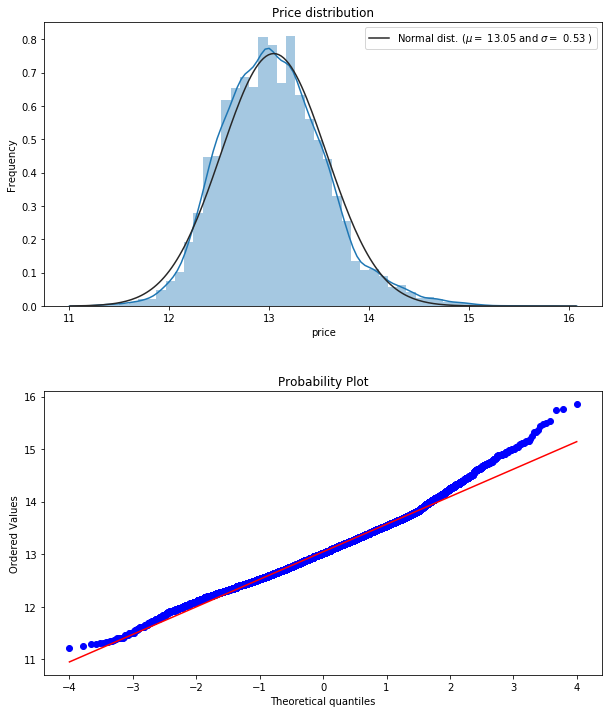

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.3)

sns.distplot(np.log1p(df.price) , fit=norm, ax=ax1)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df.price))
skewness = skew(np.log1p(df.price))

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print('skewness: {:.2f}\n'.format(skewness))

#Now plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Price distribution')

#Get also the QQ-plot
res = stats.probplot(np.log1p(df.price), plot=ax2)
plt.show()

By applying a log transform, we can produce a distribution of data close to normal. This will be applied later in feature engineering.

### Correlation Between Features

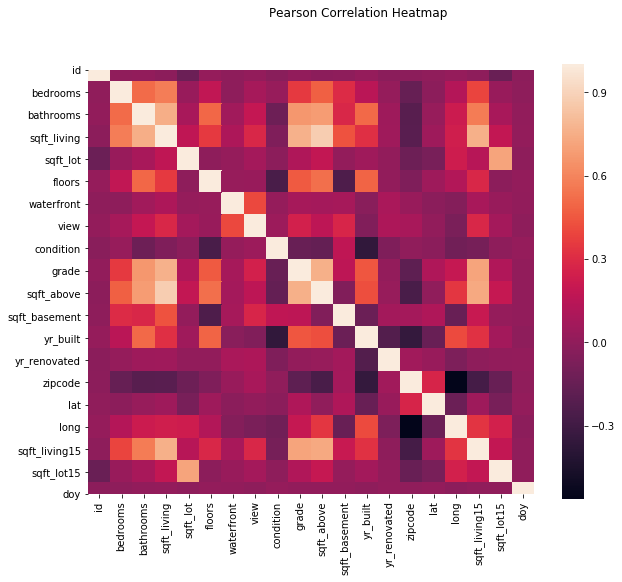

In [11]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['price'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

We can see that some features are highly correlated. For example, sqft_living, grade, sqft_above and sqft_living15. They express more or less the same thing and can cause multicollinearity problem on regression-based models. We will use XGBoost regressor which is robust on this type of problem.

### Correlation with Price

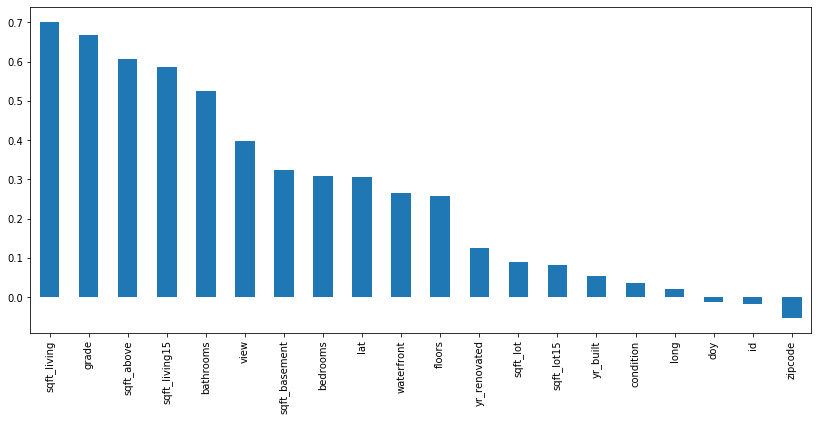

In [12]:
corr_with_price = df.corr().price.sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop(['price']).plot.bar()
plt.show()

We can see that sqft_living, grade and sqft_above are highly-correlated with price (above .6). Thus, telling us that these numerical features have some degree of skewness and has to be log-transformed with the rest of numerical features.

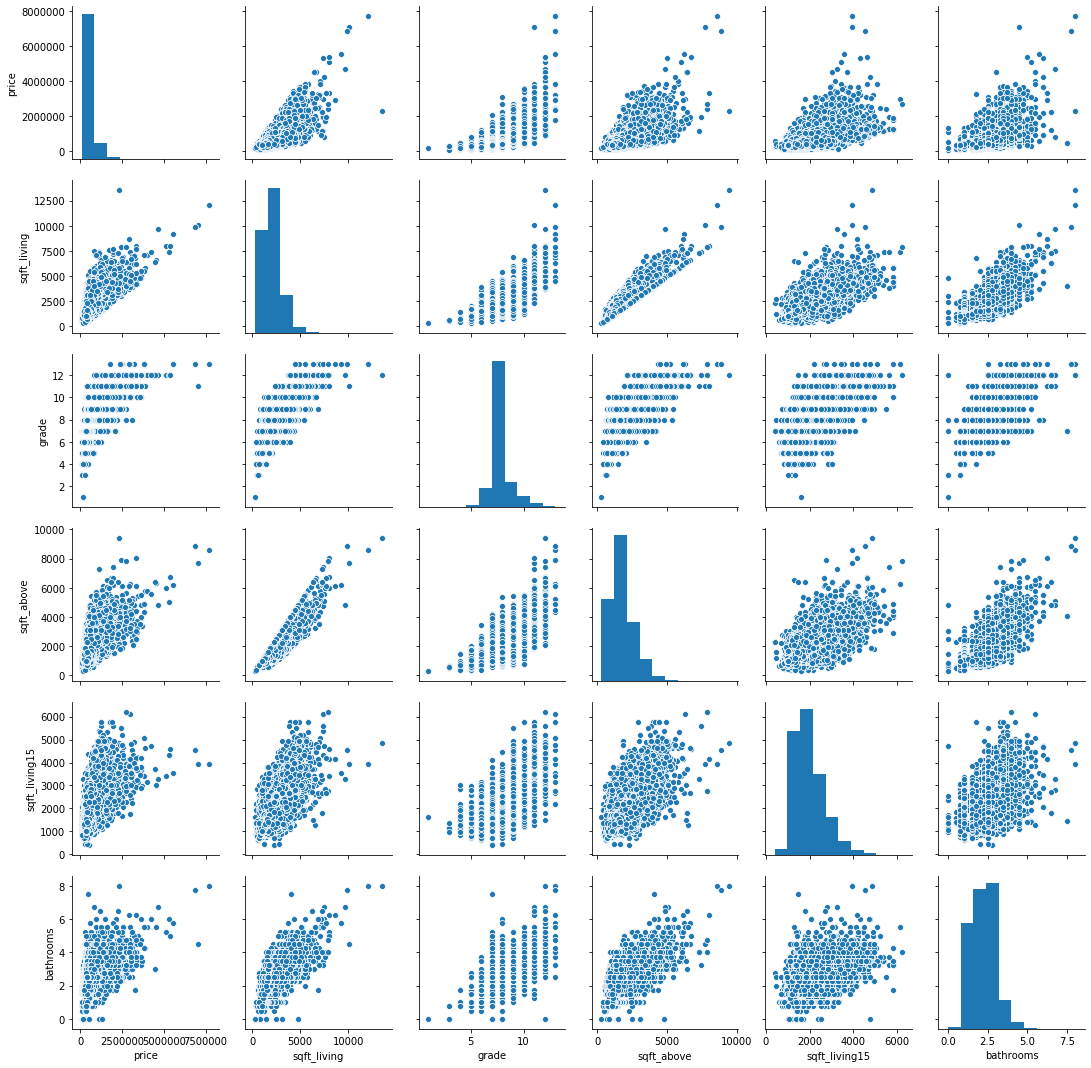

In [13]:
sns.pairplot(df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']])
plt.show()

In [14]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [15]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'doy'],
      dtype='object')

### Feature Engineering

#### Categorical Features
Some of the features are categorical or discrete and need to be encoded to maintain the order of relationship (Ordinal). Hence, we will use an Ordinal Encoder from scikit-learn to achieve this feature encoding.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

enc = OrdinalEncoder()
categorical_features = pd.DataFrame(enc.fit_transform(df[categorical_cols].values), columns=categorical_cols)
categorical_features

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,3.0,3.0,0.0,0.0,0.0,2.0,5.0,55.0,0.0,66.0
1,3.0,8.0,2.0,0.0,0.0,2.0,5.0,51.0,45.0,55.0
2,2.0,3.0,0.0,0.0,0.0,2.0,4.0,33.0,0.0,16.0
3,4.0,11.0,0.0,0.0,0.0,4.0,5.0,65.0,0.0,58.0
4,3.0,7.0,0.0,0.0,0.0,2.0,6.0,87.0,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...
21608,3.0,9.0,4.0,0.0,0.0,2.0,6.0,109.0,0.0,42.0
21609,4.0,9.0,2.0,0.0,0.0,2.0,6.0,114.0,0.0,60.0
21610,2.0,2.0,2.0,0.0,0.0,2.0,5.0,109.0,0.0,59.0
21611,3.0,9.0,2.0,0.0,0.0,2.0,6.0,104.0,0.0,15.0


#### Geospatial Features

,gspatial_0,gspatial_1,gspatial_2,gspatial_3,gspatial_4,gspatial_5,gspatial_6,gspatial_7,gspatial_8,gspatial_9,...,gspatial_40,gspatial_41,gspatial_42,gspatial_43,gspatial_44,gspatial_45,gspatial_46,gspatial_47,gspatial_48,gspatial_49
0,0.21,0.13,0.19,0.11,0.17,0.26,0.23,0.39,0.29,0.06,...,0.23,0.12,2.09e-01,0.18,0.14,0.18,0.23,0.08,0.26,0.18
1,0.10,0.34,0.31,0.20,0.08,0.47,0.44,0.48,0.29,0.19,...,0.34,0.15,4.36e-02,0.15,0.17,0.04,0.45,0.23,0.35,0.22
2,0.02,0.34,0.26,0.25,0.14,0.45,0.46,0.41,0.21,0.18,...,0.39,0.12,1.29e-01,0.09,0.23,0.08,0.46,0.21,0.29,0.16
3,0.26,0.23,0.33,0.02,0.14,0.36,0.26,0.52,0.40,0.18,...,0.13,0.21,1.79e-01,0.27,0.04,0.19,0.30,0.21,0.39,0.29
4,0.20,0.27,0.07,0.34,0.31,0.32,0.41,0.19,0.07,0.18,...,0.46,0.16,3.20e-01,0.14,0.34,0.26,0.37,0.16,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.13,0.33,0.32,0.18,0.05,0.46,0.42,0.50,0.32,0.18,...,0.31,0.16,9.27e-03,0.18,0.14,0.05,0.44,0.23,0.37,0.24
21609,0.25,0.20,0.30,0.02,0.14,0.33,0.24,0.49,0.38,0.15,...,0.14,0.19,1.85e-01,0.25,0.06,0.19,0.27,0.18,0.36,0.27
21610,0.15,0.22,0.24,0.10,0.08,0.35,0.31,0.43,0.28,0.08,...,0.24,0.10,1.16e-01,0.15,0.09,0.09,0.32,0.13,0.30,0.18
21611,0.24,0.19,0.01,0.30,0.30,0.24,0.33,0.20,0.16,0.16,...,0.41,0.16,3.28e-01,0.17,0.32,0.27,0.29,0.12,0.08,0.10


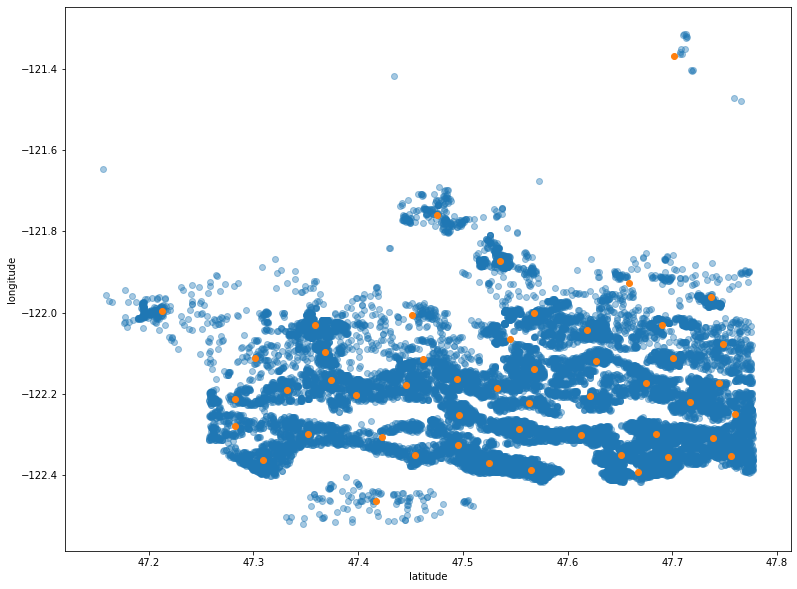

In [17]:
from sklearn.cluster import KMeans

clusters = 50
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(df[['lat', 'long']].values)
fig, ax1 = plt.subplots(figsize=(13, 10))
ax1.scatter(df.lat, df.long, alpha=0.4, label='samples')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='centers')
ax1.set_ylabel('longitude')
ax1.set_xlabel('latitude')
kmean_feats = pd.DataFrame(kmeans.fit_transform(df[['lat', 'long']].values), columns=['gspatial_' + str(i) for i in range(clusters)])
kmean_feats

#### Numerical Feats
The rest of the features are continuous and have some degree of skewness. We will select those features having skewness and log-transform them along with the target column, price.

In [18]:
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['lat', 'long']]

skew_th = 0.75
# log transform skewed numeric features:
skewed_feats = df[numerical_cols].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > skew_th]
skewed_feats = skewed_feats.index

skewed_feats = np.log1p(df[skewed_feats])
none_skewed_cols = [col for col in numerical_cols if col not in skewed_feats]
# Combine all columns
y = skewed_feats.price
X = pd.concat([categorical_features, kmean_feats, skewed_feats.drop('price', axis=1), df[['id', 'doy']]], axis=1)
feat_cols = X.columns
feat_cols

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'gspatial_0',
       'gspatial_1', 'gspatial_2', 'gspatial_3', 'gspatial_4', 'gspatial_5',
       'gspatial_6', 'gspatial_7', 'gspatial_8', 'gspatial_9', 'gspatial_10',
       'gspatial_11', 'gspatial_12', 'gspatial_13', 'gspatial_14',
       'gspatial_15', 'gspatial_16', 'gspatial_17', 'gspatial_18',
       'gspatial_19', 'gspatial_20', 'gspatial_21', 'gspatial_22',
       'gspatial_23', 'gspatial_24', 'gspatial_25', 'gspatial_26',
       'gspatial_27', 'gspatial_28', 'gspatial_29', 'gspatial_30',
       'gspatial_31', 'gspatial_32', 'gspatial_33', 'gspatial_34',
       'gspatial_35', 'gspatial_36', 'gspatial_37', 'gspatial_38',
       'gspatial_39', 'gspatial_40', 'gspatial_41', 'gspatial_42',
       'gspatial_43', 'gspatial_44', 'gspatial_45', 'gspatial_46',
       'gspatial_47', 'gspatial_48', 'gspatial_49', 'sqft_living', 'sqft_lot',
       'sqft_abov

In [19]:
from sklearn.model_selection import train_test_split

seed = 7

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = seed)

### Building the Model

#### ElasticNetCV
Since this task is a regression type, we can use, ElasticnetCV. ElasticNetCV is a regression model that uses the Lasso and Ridge regressions (l1 and l2-norm regularization of the coefficients). Thus maintaining the properties of the former, reducing over-fitting and assess in feature selection and the latter, shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

In [20]:
from sklearn.linear_model import ElasticNetCV

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=200, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=2, 
                        copy_X=True, verbose=0, n_jobs=1, positive=False, random_state=seed)

cv_model.fit(X_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

/home/emman/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24271670439844684, tolerance: 0.24006616918672216
  tol, rng, random, positive)
/home/emman/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3226826500816742, tolerance: 0.24240344120007412
  tol, rng, random, positive)
/home/emman/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.301176368338929, tolerance: 0.24240344120007412
  tol, rng, random, positive)
/home/emman/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did n

Optimal alpha: 0.00000283
Optimal l1_ratio: 1.000
Number of iterations 2000


/home/emman/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.43439775691371, tolerance: 0.48248689504116266
  positive)


#### Evaluation

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.8703328898014029
Test r2 score:  0.8798619774100004
Train RMSE: 0.1780
Test RMSE: 0.1803


We can see from the results that the "R squared" reached 88% with "root-mean-squared-error" of 0.18.


#### XGBoost Regressor with Hyperparameter Tuning

Let us try another type of machine learning model, XGBoostRegresor. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. This is also an appropriate model that solves the issue on multicollinearity. <br>
To assess the choosing of the parameters, we will use gridsearching with cross-validation.

In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

metric = 'rmse'

params = {
          'learning_rate': [0.05, 0.1],
          'booster': ['gbtree'],
          'max_depth': [6],
          'n_estimators': [100],
          'min_child_weight': [0, .1],
          'colsample_bytree': [.8, 1],
          'subsample': [.7, .8, 1],
          # 'gamma': [0, .1, 1]
         }
xgb_model = XGBRegressor(objective ='reg:squarederror', random_state=7)
xgb_grid = GridSearchCV(xgb_model, params, cv=2, n_jobs=6, verbose=True)
xgb_grid.fit(X_train, y_train, eval_metric=metric)
print('Mean Cross-Validated Score: ', xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed:  2.2min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Cross-Validated Score:  0.9025543113961725
{'booster': 'gbtree', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 0, 'n_estimators': 100, 'subsample': 0.7}


In [23]:
xgb_model = XGBRegressor(objective ='reg:squarederror', random_state=7, **xgb_grid.best_params_)

xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10,
        eval_metric=metric, verbose=False)
print(xgb_model)
evals_result = xgb_model.evals_result()
print('Loss: ', evals_result['validation_0'][metric][-1], '\nVal_Loss: ', evals_result['validation_1'][metric][-1])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=0, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)
Loss:  0.132932 
Val_Loss:  0.16406


### Evaluation

In [24]:
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
test_mse_usd = mean_squared_error(np.expm1(y_pred), np.expm1(y_test))
test_rmse_usd = np.sqrt(test_mse_usd)
print('Test RMSE in usd %.4f' % test_rmse_usd)

Train r2 score:  0.9301692836466791
Test r2 score:  0.9006490501852218
Train RMSE: 0.1332
Test RMSE: 0.1640
Test RMSE in usd 113958.7077


The results above is an improvement of the previous model.<br>

We can also find which features are considered important by the model.

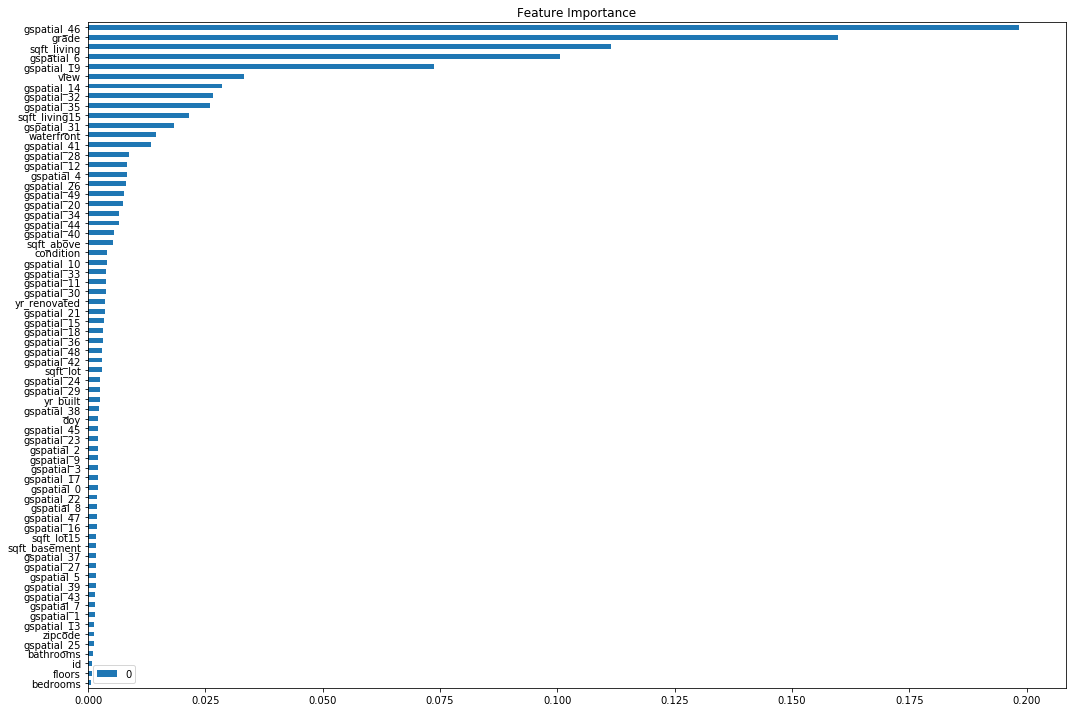

In [25]:
feats=pd.DataFrame(xgb_model.feature_importances_, index=feat_cols)
sort_feats=feats.sort_values(0,ascending=True)
sort_feats.plot(kind='barh', title='Feature Importance', figsize=(15, 10))
plt.tight_layout()
plt.show()

### Plot the Results
We can look at the training and testing history which will tell us how fast the model converges.

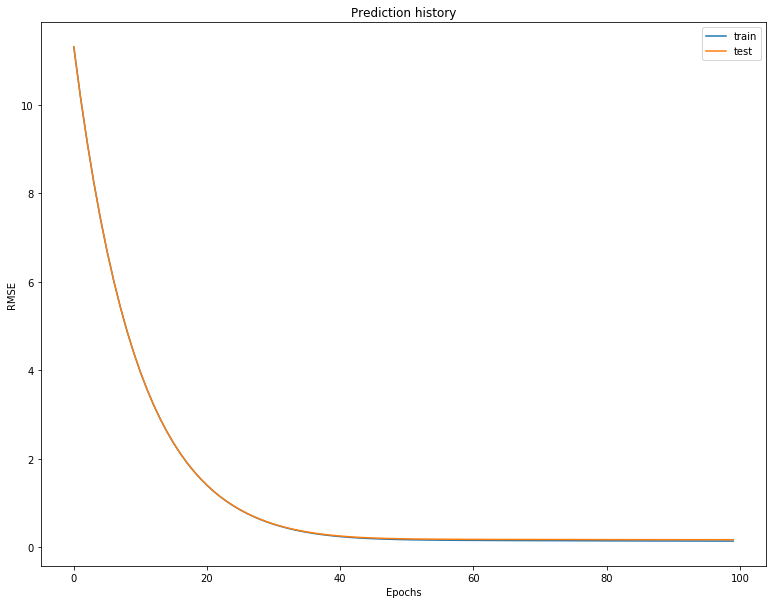

In [26]:
def plot_result_history():
    fig, ax = plt.subplots(figsize=(13, 10))
    ax.plot(evals_result['validation_0'][metric], label='train')
    ax.plot(evals_result['validation_1'][metric], label='test')
    ax.legend()
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.upper())
    ax.set_title('Prediction history')
    plt.show()
    
plot_result_history()

We can see that the model has reached near the minimum around 50 epochs in both training and testing. 

The plot below visualizes how the predicted values close to the actual values, the closer the dots to the dashed line, the more accurate the model is.

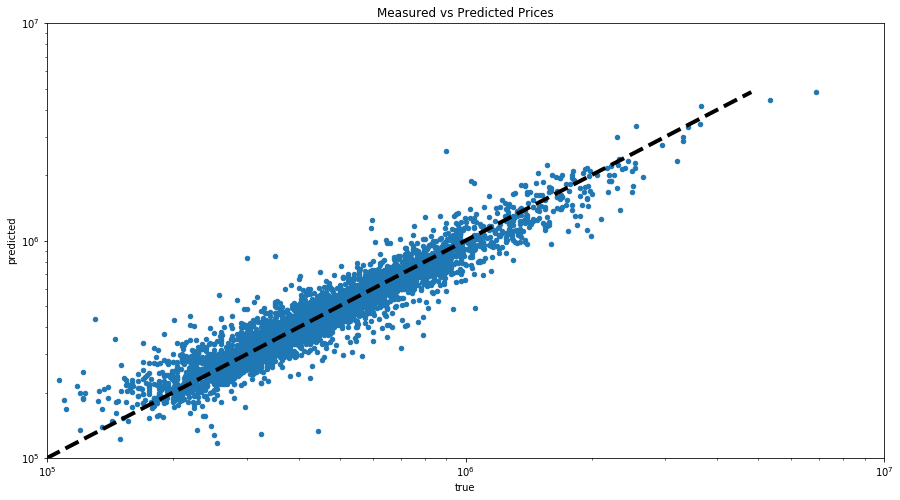

In [27]:
fig, ax = plt.subplots()
ax = pd.DataFrame(list(zip(np.expm1(y_test).ravel(), np.expm1(y_pred.reshape(-1, 1)).ravel())), columns=['true', 'predicted']).plot(x='true', y='predicted', kind='scatter', title='Measured vs Predicted Prices', loglog=True, xlim=(1e5, 1e7), ylim=(1e5, 1e7), figsize=(15, 8), ax=ax)
ax.plot([np.expm1(y_test).ravel().min(), np.expm1(y_pred.reshape(-1, 1)).ravel().max()], [np.expm1(y_test).ravel().min(), np.expm1(y_pred.reshape(-1, 1)).ravel().max()], 'k--', lw=4)

#### Conclusion

We have shown that for a regression modelling, we need to transform the target and features close to a normal distribution. For geospatial features, we have to transform the data so that it will consider distances to special points. In this case, we used clustering to arbitrarily select the center points of the cluster. It turns out that these spatial features are important for the model to achieve good results. Furthermore, XGBoostRegressor is performing better than ElasticNetCV.

### Future Improvements
There are several ways to improve the model;
- 1) Improve the spatial engineering by using 'geoencoders'. Geoencoders provides us the real geographic spatial features such as cities, distance to big cities and other objects. I started this method but eventually abandoned and used clustering method instead since geoencoding is computationally expensive and time consuming.
- 2) Hyper-parameter tuning. Test the other paramaters for optimal results for each model.
- 3) Neural Network Model. I have used deep learning (Feed-forward model) with Keras platform before on regression task. It yielded similar results with XGBoostRegressor. However, it may worth to explore deep learning models to see if there are any improvements of the predictive power. 